# Rede Neurais Artificiais - Introdução

* As redes neurais artificiais (RNAs) são modelos computacionais inspirados no funcionamento do cérebro humano. Elas são compostas por unidades interconectadas chamadas neurônios artificiais, organizadas em camadas. Cada neurônio recebe entradas, realiza um processamento interno e gera uma saída. As RNAs são treinadas por meio de um processo de ajuste de pesos, que são valores numéricos associados às conexões entre os neurônios, com o objetivo de minimizar o erro entre as saídas previstas e os valores reais.

* O aprendizado nas RNAs pode ser supervisionado, onde um conjunto de dados rotulados é utilizado para treinar o modelo, ou não supervisionado, onde o modelo tenta identificar padrões ou agrupamentos nos dados sem rótulos explícitos. Existem diversos tipos de arquiteturas de redes neurais, como as redes neurais feedforward, que têm conexões unidirecionais entre os neurônios, e as redes neurais recorrentes, que permitem conexões entre neurônios em diferentes camadas ou na mesma camada, possibilitando a modelagem de dados sequenciais.

* As RNAs têm sido aplicadas com sucesso em uma ampla gama de tarefas, incluindo reconhecimento de voz, visão computacional, processamento de linguagem natural e jogos. Seu sucesso se deve à sua capacidade de aprender representações complexas e generalizar a partir de grandes volumes de dados.

# RNA Perceptron - Teoria

## Perceptron


O perceptron é um tipo de rede neural artificial fundamental que serve como bloco de construção para redes neurais mais complexas. Introduzido por Frank Rosenblatt em 1957, o perceptron é uma unidade de processamento que realiza uma tarefa de classificação binária, decidindo entre duas classes possíveis.

![perceptron](./images/perceptron.png)

### Estrutura do Perceptron

O perceptron é composto por:

1. **Entradas (inputs):** Um vetor de valores $x_1, x_2, ..., x_n$ que representam as características do dado de entrada.

2. **Pesos (weights):** Um vetor de pesos $w_1, w_2, ..., w_n$ associados a cada entrada, que são ajustados durante o processo de treinamento.

3. **Somador:** Um somador que calcula a soma ponderada das entradas. Esta soma é dada por:
   $$ 
   z = \displaystyle\sum_{i=1}^{n} w_i x_i + b 
   $$ 
   onde $b$ é o termo de viés (bias), que permite ajustar o limiar da função de ativação.

4. **Função de ativação:** Uma função que recebe o valor $z$ e gera a saída do perceptron. No perceptron original, a função de ativação é a função degrau (step function), definida como:

   \begin{cases}
   1, & \text{se } z \geq 0 \\
   0, & \text{se } z < 0
   \end{cases}

### Processo de Treinamento

O treinamento do perceptron envolve ajustar os pesos $w_i$ de maneira que a saída produzida pelo perceptron corresponda o mais próximo possível aos rótulos de classe dos dados de treinamento. O algoritmo de treinamento pode ser descrito como segue:

1. **Inicialização:** Os pesos são inicializados com valores pequenos aleatórios ou zeros.

2. **Atualização de pesos:** Para cada exemplo de treinamento, calcular a saída do perceptron. Se a saída estiver correta, não fazer nada. Se estiver incorreta, atualizar os pesos usando a regra de aprendizado do perceptron:
   $$ w_i \leftarrow w_i + \Delta w_i $$

   onde

   $$ \Delta w_i = \eta (d - y) x_i $$
   
   e:
   
      - $\eta$ é a taxa de aprendizado, um pequeno valor positivo.
      - $d$ é o valor desejado (rótulo de classe).
      - $y$ é a saída atual do perceptron.
      - $x_i$ é o valor da entrada correspondente.
      
3. **Iteração:** Repetir o processo de atualização para todos os exemplos de treinamento até que os pesos se estabilizem, ou seja, até que não haja mais erros de classificação.

### Limitações e Extensões

O perceptron simples só pode resolver problemas linearmente separáveis, ou seja, onde as duas classes podem ser separadas por uma linha reta (hiperplano). Ele não pode resolver problemas onde as classes não são linearmente separáveis, como o problema do XOR.

Para superar essa limitação, foram desenvolvidas redes neurais mais complexas, como o perceptron multicamadas (MLP), que consiste em várias camadas de neurônios e utiliza funções de ativação não lineares, permitindo que a rede aprenda representações mais complexas e resolva problemas não linearmente separáveis.

## Perceptron - Exemplo

### Importando bibliotecas necessárias

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Criando o modelo RNA - Perceptron

In [130]:
class Perceptron:

    def __init__(self, input_shape: tuple, alpha: float = 0.1):
        self.input_shape = input_shape
        self.weights = np.random.random(input_shape) * 0.0000001
        self.alpha = alpha

    def sum(self, x):
        return np.dot(x, self.weights)

    def step(self, x):
        return 1 if x > 0 else 0
    
    def fit(self, X, y, epochs=10, useBias: bool = False):
        # Inserting the bias term and using it to train the model
        if useBias:
            X = np.c_[X, np.ones((X.shape[0]))]
            self.weights = np.append(self.weights, np.zeros((self.weights.shape[0])))
        accuracy = []

        for epoch in np.arange(0, epochs):
            for (x, target) in zip(X, y):
                # take the dot product between the input features
                # and the weight matrix, then pass this value
                # through the step function to obtain the prediction
                prediction = self.step(np.dot(x, self.weights))

                if prediction != target:
                    error = target - prediction
                    self.weights += - self.alpha * error * x
                    accuracy.append(0)
                else:
                    accuracy.append(1)
            
            if epoch % 10 == 0:
                print(f"Epoch: {epoch}, Weights: {self.weights}")
                accuracy = []
    
    def predict(self, X, addBias=False):
        # Garantir que X seja um array 2D (matriz)
        X = np.atleast_2d(X)

        if addBias:
            X = np.c_[X, np.ones(X.shape[0])]
        
        return self.step(np.dot(X, self.weights))

In [133]:
# construct the OR dataset (Refazer com otras tabelas verdades)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

data_shape = X.shape[1]
print("Dimensão entrada: ", data_shape)
network = Perceptron(data_shape, alpha=0.1)
network.fit(X, y, epochs=10)

Dimensão entrada:  2
Epoch: 0, Weights: [8.41940503e-08 4.36064060e-08]


In [132]:
for (x, target) in zip(X, y):
	print(x, target)
	pred = network.predict(x)
	print("[INFO] data={}, ground-truth={}, pred={}".format(x, target[0], pred))

[0 0] [0]
[INFO] data=[0 0], ground-truth=0, pred=0
[0 1] [1]
[INFO] data=[0 1], ground-truth=1, pred=1
[1 0] [1]
[INFO] data=[1 0], ground-truth=1, pred=1
[1 1] [1]
[INFO] data=[1 1], ground-truth=1, pred=1


## Percepron Multicamadas (MLP)

O Perceptron Multicamadas (MLP) é uma extensão do perceptron simples, projetado para superar as limitações dos problemas linearmente separáveis. O MLP é uma rede neural artificial que consiste em múltiplas camadas de neurônios, incluindo uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída.

![mlp](./images/dense.png)

### Estrutura do MLP

1. **Camada de Entrada:** Recebe o vetor de características $x_1, x_2, \ldots, x_n$ dos dados de entrada.
2. **Camadas Ocultas:** Compostas por neurônios que processam as entradas por meio de uma função de ativação não linear. Cada neurônio em uma camada oculta recebe entradas ponderadas da camada anterior, aplica uma soma ponderada seguida de uma função de ativação, como a função sigmoide, ReLU (Rectified Linear Unit) ou tanh.
3. **Camada de Saída:** Gera as previsões ou classificações finais. A função de ativação na camada de saída pode variar dependendo do tipo de problema (classificação binária, multiclasse, regressão, etc.).

### Funcionamento

O funcionamento do MLP pode ser dividido em duas fases principais:

1. **Propagação Direta (Forward Propagation):**
   - Cada neurônio calcula a soma ponderada de suas entradas.
   - A soma ponderada é passada por uma função de ativação não linear.
   - O processo é repetido para todas as camadas até a camada de saída, onde a previsão final é gerada.

2. **Retropropagação (Backpropagation):**
   - O erro é calculado na camada de saída comparando a previsão com o valor real.
   - O erro é propagado de volta através da rede, ajustando os pesos para minimizar o erro.
   - O ajuste dos pesos é realizado usando o gradiente descendente, que atualiza os pesos na direção oposta ao gradiente do erro em relação aos pesos.

### Aprendizado

O treinamento do MLP envolve a repetição das fases de propagação direta e retropropagação para cada exemplo de treinamento, até que a rede converge para um conjunto de pesos que minimiza o erro global. Os principais passos são:

1. **Inicialização dos Pesos:** Os pesos são inicializados com valores pequenos aleatórios.
2. **Propagação Direta:** Calcula a saída da rede para uma dada entrada.
3. **Cálculo do Erro:** Compara a saída prevista com o valor real e calcula o erro.
4. **Retropropagação do Erro:** Calcula os gradientes do erro em relação aos pesos e ajusta os pesos usando um algoritmo de otimização, como o gradiente descendente.
5. **Iteração:** Repete o processo para todas as amostras de treinamento por várias épocas até a convergência.

### Aplicações e Vantagens

O MLP é capaz de aprender e modelar relações complexas e não lineares nos dados. Ele é amplamente utilizado em diversas aplicações, como reconhecimento de padrões, previsão de séries temporais, reconhecimento de fala, e muito mais. Suas vantagens incluem a capacidade de capturar dependências complexas entre as variáveis de entrada e a flexibilidade para ser aplicado a uma vasta gama de problemas de aprendizado supervisionado.

## MLP - Exemplo	

### Importando bibliotecas necessárias

In [140]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# https://keras.io/api/ <-- CONSULTE A DOCUMENTACÃO
from keras.api.models import Sequential
from keras.api.layers import Dense, Input
from keras.api.utils import to_categorical

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Carregando o dataset

In [141]:
dataset = load_iris()
labels = dataset.target
label_names = dataset.target_names

# Convertendo para um DataFrame da biblioteca Pandas
dataset = pd.DataFrame(dataset.data, columns=dataset.feature_names)
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [142]:
print(label_names)
print(labels)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Analisando características

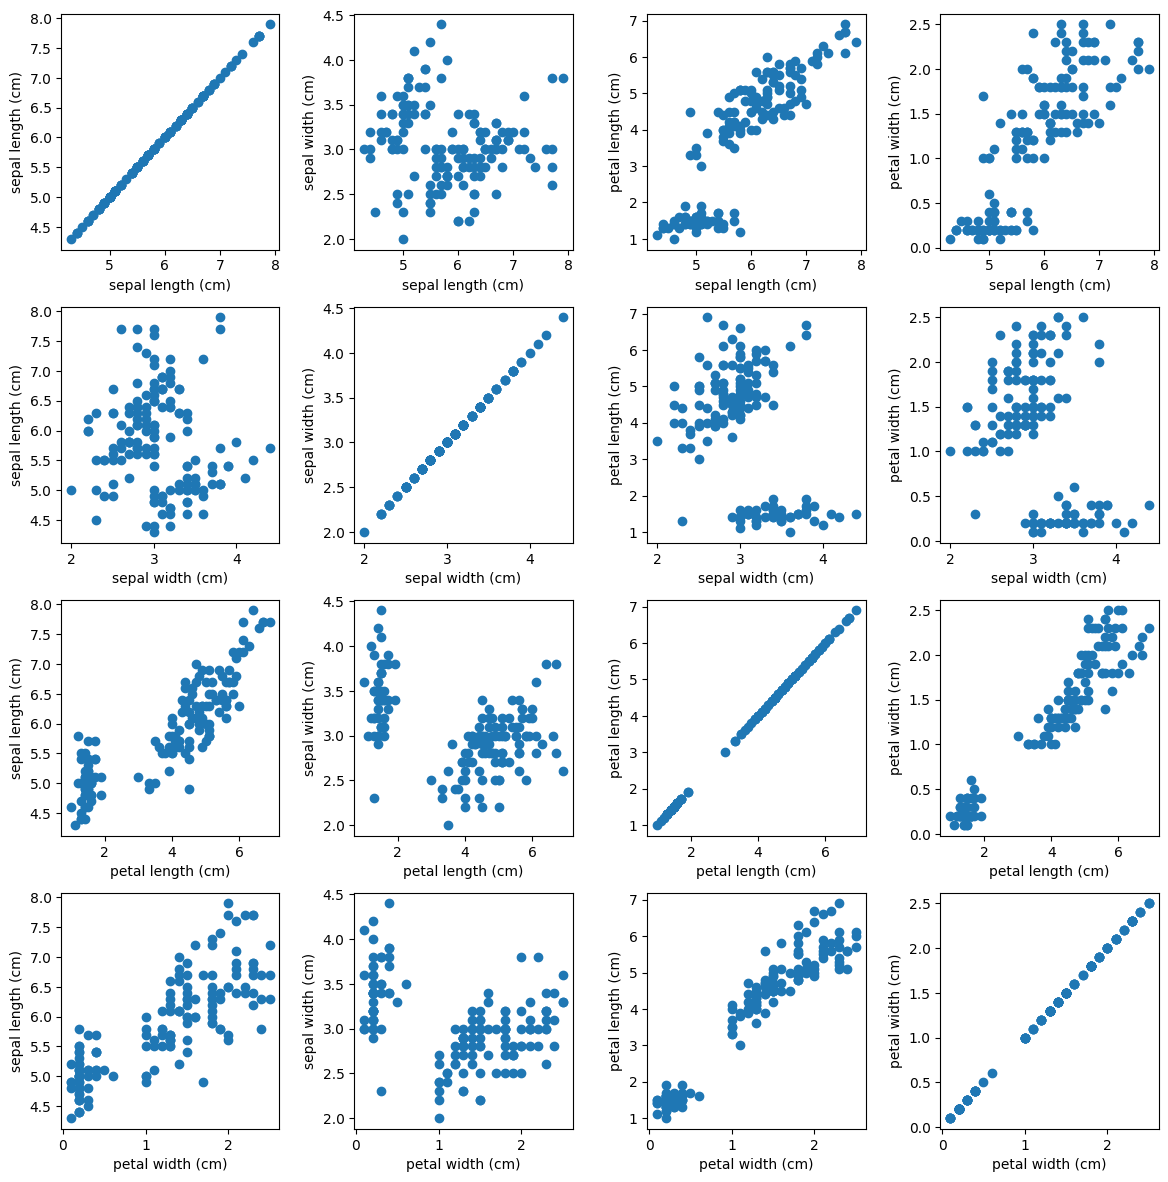

In [143]:
def plot_dataset(dataset: pd.DataFrame):
    fig, axs = plt.subplots(figsize=(12, 12), nrows=4, ncols=4)
    fig.tight_layout(pad=2.0)
    for i in range(dataset.columns.shape[0]):
        for j in range(dataset.columns.shape[0]):
            axs[i, j].scatter(dataset.iloc[:, i], dataset.iloc[:, j])
            axs[i, j].set_xlabel(dataset.columns[i])
            axs[i, j].set_ylabel(dataset.columns[j])

plot_dataset(dataset)

### Separando dados de treinamento e teste

* Fazemos isso para treinar a rede com um grupo de dados e validar se o que ela estimou durante o treinamente é real e aplicavel em dados novos.
Esse procedimento auxilia a reduzir o efeito de "overfitting", que acontece quando uma rede neural se adapta muito bem a dados de treinamento, mas quando novos dados são inseridos na rede, ela não é capaz de identificar o resultado.

In [144]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset, labels, test_size=0.2
)

### Normalização

* Nessa etapa, tentamos normalizar os dados entre 0 e 1 sempre que possível. Isso torna o treinamento da rede mais prático e rápido.

In [145]:
scaller= MinMaxScaler(
    feature_range=(0, 1)
)
X_train = scaller.fit_transform(X_train)
X_test = scaller.fit_transform(X_test)

Validando se os dataset estão coerentes ainda

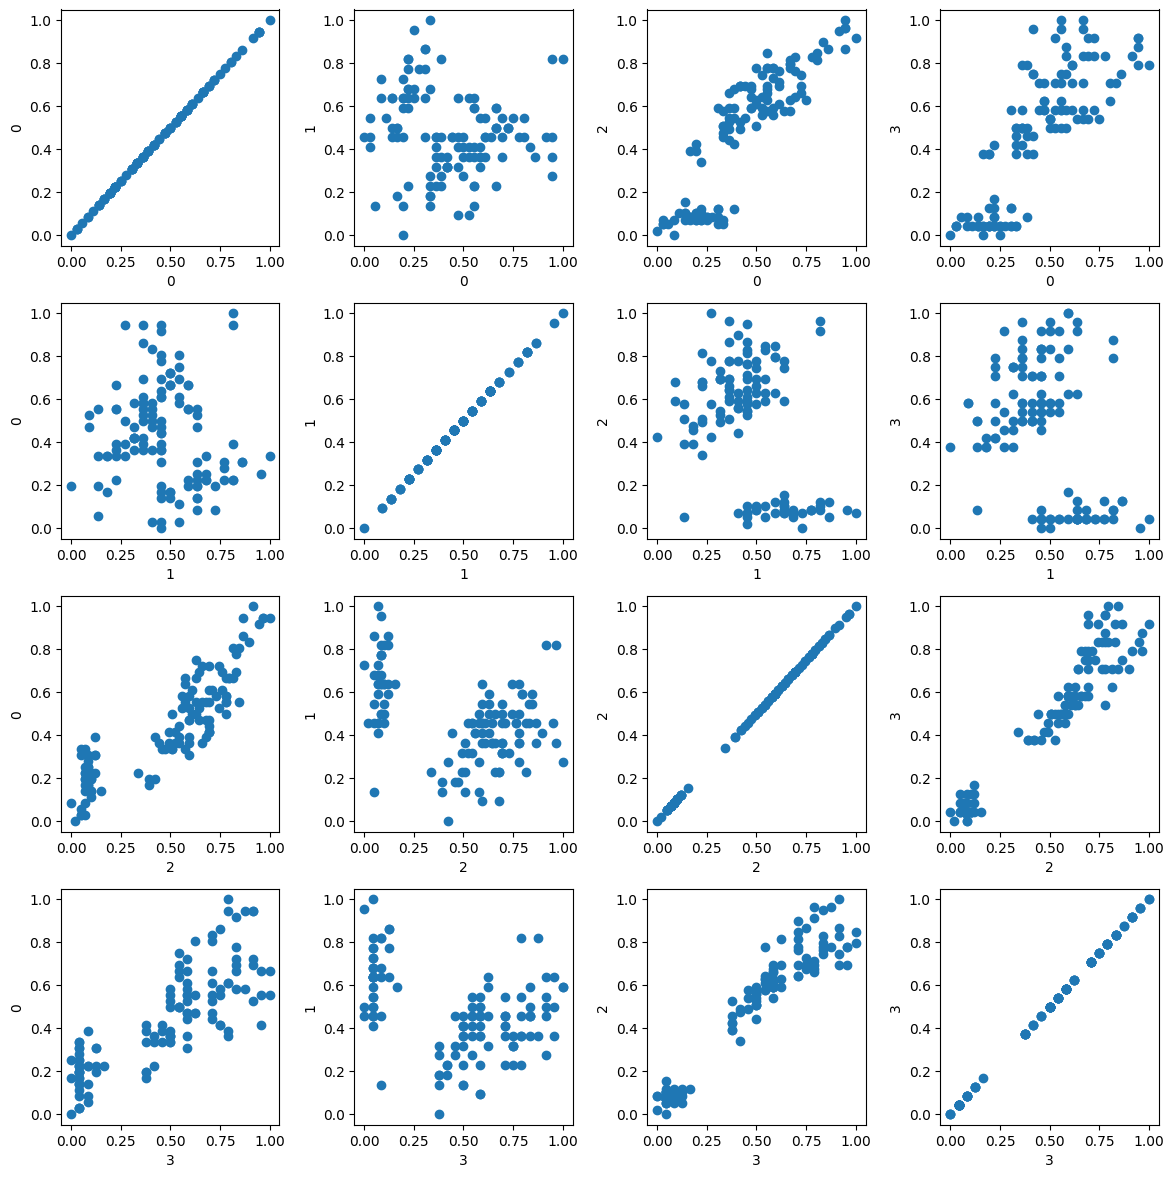

In [34]:
plot_dataset(pd.DataFrame(X_train))

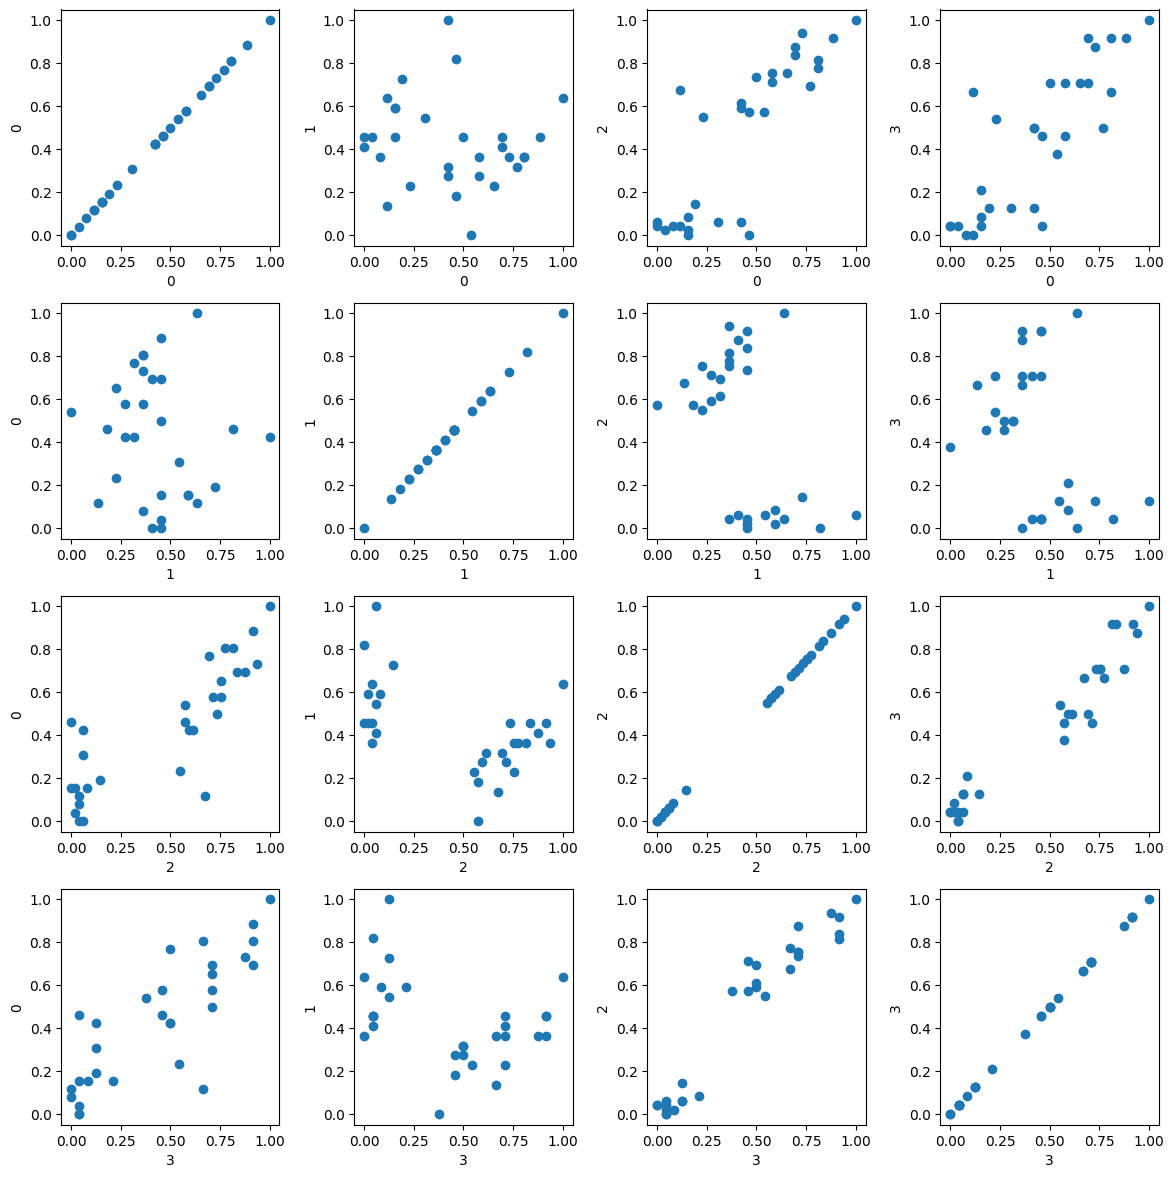

In [35]:
plot_dataset(pd.DataFrame(X_test))

### Criando o modelo MLP

#### Neurônio denso
https://machinelearningknowledge.ai/keras-dense-layer-explained-for-beginners/

* Resumidamente: Neurônio que se conecta com todos as entradas e saidas

![dendo](./images/dense.png)


In [146]:
label_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [168]:
numero_flores_para_prever = label_names.shape[0] # 3 -> Classificação multicategoria

network = Sequential(
    layers=[
        Input(shape=X_train.shape[1:])
    ]
)

# Camada oculta 1
network.add(
    Dense(
        units=8,
        activation="linear",
    )
)

# Camada oculta 2
network.add(
    Dense(
        units=8,
        activation="linear",
    )
)

network.add(
    Dense(
        units=3,
        activation="softmax", # para multicategoria usa-se softmax. Para problemas binários usa-se sigmoid
    )
)

network.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

network.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

In [169]:
print(X_train.shape, y_train.shape) # shapes inadequado para a rede neural (3 outputs)
y_train_cat = to_categorical(y_train, numero_flores_para_prever)

print(X_train.shape, y_train_cat.shape) # Shape adequado para a rede neural

(120, 4) (120,)
(120, 4) (120, 3)


In [170]:
historico = network.fit(
    x=X_train,
    y=y_train_cat,
    epochs=500,
    batch_size=4,
)

Epoch 1/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1305 - loss: 1.1995   
Epoch 2/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3252 - loss: 1.1116
Epoch 3/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4764 - loss: 1.0490
Epoch 4/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6337 - loss: 0.9929
Epoch 5/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7241 - loss: 0.8959
Epoch 6/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6929 - loss: 0.8441
Epoch 7/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6759 - loss: 0.7856
Epoch 8/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6226 - loss: 0.7551
Epoch 9/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6740 - loss: 0.6619
Epoch 10/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7672 - loss: 0.5754
Epoch 11/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7439 - loss: 0.5414
Epoch 12/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accura

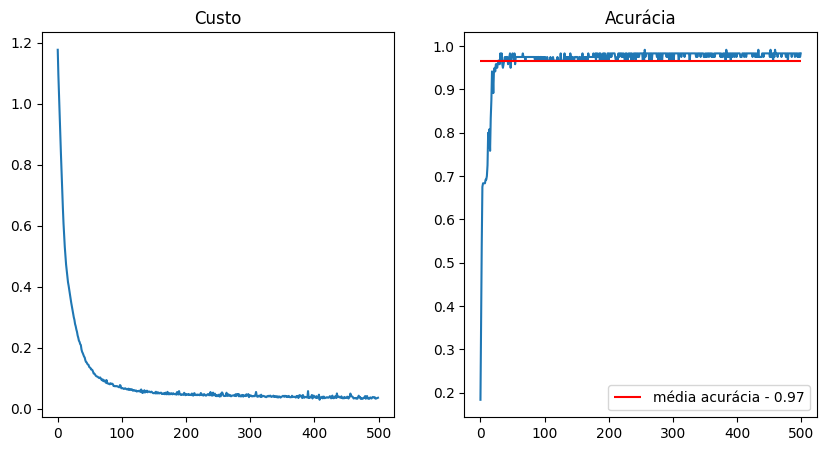

In [180]:
# Mostra o historico de treinamento
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax1.plot(historico.history['loss'])
ax1.set_title('Custo')

ax2.plot(historico.history['accuracy'])
acc_mean = np.mean(historico.history['accuracy'])
ax2.hlines(
    y=acc_mean,
    xmin=historico.epoch[0],
    xmax=historico.epoch[-1],
    colors='red',
    label=f'média acurácia - {acc_mean.round(2)}'
)
ax2.set_title('Acurácia')
ax2.legend()

plt.show()

### Avaliando o modelo

In [183]:
predict = network.predict(X_test)
predict = np.argmax(predict, axis=1) # Pega o index da posição da previsão com maior probabilidade
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2,
       2, 0, 2, 1, 2, 2, 0, 1])

In [194]:
cm

array([[ 6,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 12]])

Acurácia: 96.67%


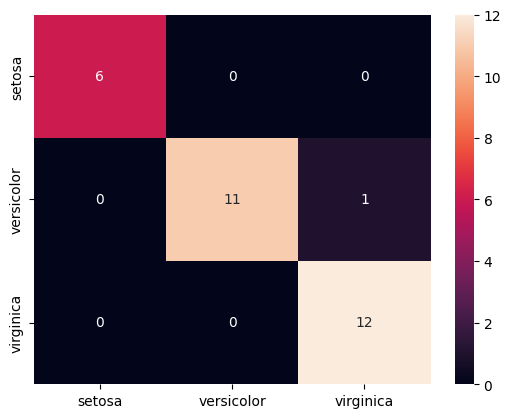

In [196]:
from sklearn.metrics import accuracy_score, confusion_matrix
acuracia = accuracy_score(y_test, predict)
print(f"Acurácia: {round(acuracia,4)*100}%")

cm = confusion_matrix(y_test, predict)
df = pd.DataFrame(cm, index=label_names, columns=label_names)
sns.heatmap(df, annot=True, ); 

# errou apenas uma virginica achando que era versicolor

# Referências

* https://keras.io/api/
* https://machinelearningknowledge.ai/keras-dense-layer-explained-for-beginners/
* https://pyimagesearch.com/2021/05/06/implementing-the-perceptron-neural-network-with-python/
* https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/
* https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br
* https://towardsdatascience.com/the-complete-guide-to-neural-networks-multinomial-classification-4fe88bde7839